In [2]:
# Building a flexible function which is not range bound

import os
import pandas as pd
import re

def load_and_prepare_fleet_data(data_dir):
    all_data = []
    pattern = re.compile(r"Fleet_Data_(\d{4})\.csv")

    for file in os.listdir(data_dir):
        match = pattern.match(file)
        if match:
            year = int(match.group(1))
            file_path = os.path.join(data_dir, file)
            df = pd.read_csv(file_path)

            # Cleaning and normalizing columns
            df.columns = df.columns.str.strip().str.lower()

            # filtering "type swap" from status
            if 'status' in df.columns:
                df = df[~df['status'].str.lower().str.contains("type swap", na=False)]

            # Adding an year column in each file before merging the dataset
            df["year"] = year
            all_data.append(df)

    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        raise FileNotFoundError("No fleet files found.")

In [3]:
# PWD
import os
os.getcwd()

'C:\\Users\\Peeyush.sharma\\Fleet Data'

In [4]:
df_fleet = load_and_prepare_fleet_data(r"C:\Users\Peeyush.sharma\Fleet Data")

In [5]:
df_fleet.head(25)

,type,serial number,number of seats,operator,master series,status,manufacturer,in service date,registration,number of seats estimated,year
0,707,17613,0.0,Air France,707-300,Written off,Boeing,1959-10-21,F-BHSA,0.0,1985
1,707,17614,0.0,Air France,707-300,Retired,Boeing,1959-12-12,F-BHSB,0.0,1985
2,707,17616,0.0,Air France,707-300,Retired,Boeing,1960-01-29,F-BHSD,0.0,1985
3,707,17618,0.0,Air France,707-300,Retired,Boeing,1960-03-24,F-BHSF,0.0,1985
4,707,17620,0.0,Air France,707-300,Written off,Boeing,1960-06-23,F-BHSH,0.0,1985
5,707,17621,0.0,Air France,707-300,Retired,Boeing,1960-07-11,F-BHSI,0.0,1985
6,707,17622,0.0,Air France,707-300,Retired,Boeing,1960-07-29,F-BHSJ,0.0,1985
7,707,17629,0.0,American Airlines,707-100,Written off,Boeing,1959-05-04,N7502A,0.0,1985
8,707,17630,0.0,American Airlines,707-100,Retired,Boeing,1958-12-31,N7503A,0.0,1985
9,707,17633,0.0,American Airlines,707-100,Written off,Boeing,1959-02-13,N7506A,0.0,1985


In [6]:
# droping columns
df_fleet.drop(['number of seats estimated', 'number of seats'], axis=1, inplace=True)

In [7]:
df_fleet.head(25)

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year
0,707,17613,Air France,707-300,Written off,Boeing,1959-10-21,F-BHSA,1985
1,707,17614,Air France,707-300,Retired,Boeing,1959-12-12,F-BHSB,1985
2,707,17616,Air France,707-300,Retired,Boeing,1960-01-29,F-BHSD,1985
3,707,17618,Air France,707-300,Retired,Boeing,1960-03-24,F-BHSF,1985
4,707,17620,Air France,707-300,Written off,Boeing,1960-06-23,F-BHSH,1985
5,707,17621,Air France,707-300,Retired,Boeing,1960-07-11,F-BHSI,1985
6,707,17622,Air France,707-300,Retired,Boeing,1960-07-29,F-BHSJ,1985
7,707,17629,American Airlines,707-100,Written off,Boeing,1959-05-04,N7502A,1985
8,707,17630,American Airlines,707-100,Retired,Boeing,1958-12-31,N7503A,1985
9,707,17633,American Airlines,707-100,Written off,Boeing,1959-02-13,N7506A,1985


In [9]:
df_fleet.tail(25)

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year
774213,Y-7,03703,China Southern Airlines,Y-7,Retired,Xian Aircraft Company,1985-06-30,B-3456,2022
774214,Y-7,03704,China Southern Airlines,Y-7,Retired,Xian Aircraft Company,1985-06-30,B-3457,2022
774215,Y-7,03705,China Southern Airlines,Y-7,Retired,Xian Aircraft Company,1985-06-30,B-3458,2022
774216,Y-7,04701,China Eastern Airlines,Y-7 100,Retired,Xian Aircraft Company,1985-06-30,B-3459,2022
774217,Y-7,04702,China Eastern Airlines,Y-7 100,Retired,Xian Aircraft Company,1985-06-30,B-3460,2022
774218,Y-7,04703,Air China,Y-7 100,Retired,Xian Aircraft Company,1985-06-30,B-3461,2022
774219,Y-7,04704,Air China,Y-7 100,Retired,Xian Aircraft Company,1985-06-30,B-3462,2022
774220,Y-7,04705,Air China,Y-7 100,Retired,Xian Aircraft Company,1985-06-30,B-3463,2022
774221,Y-7,04706,China Southern Airlines,Y-7 100,Retired,Xian Aircraft Company,1985-06-30,B-3464,2022
774222,Y-7,05702,China Southern Airlines,Y-7 100,Retired,Xian Aircraft Company,1988-06-30,B-3465,2022


In [10]:
df_fleet['year'].value_counts().sort_index()

year
1985     9383
1986     9817
1987    10459
1988    11513
1989    13112
1990    13759
1991    13960
1992    12222
1993    12046
1994    11029
1995    11201
1996    12075
1997    13114
1998    13959
1999    14285
2000    15153
2001    15909
2002    16642
2003    17213
2004    17957
2005    19330
2006    20163
2007    21709
2008    22460
2009    23020
2010    24125
2011    27359
2012    28750
2013    30937
2014    32111
2015    33447
2016    34163
2017    34720
2018    35126
2019    36124
2020    36059
2021    37771
2022    12056
Name: count, dtype: int64

In [11]:
df_fleet.columns

Index(['type', 'serial number', 'operator', 'master series', 'status',
       'manufacturer', 'in service date', 'registration', 'year'],
      dtype='object')

In [12]:
# Checking Type Swap Values
df_fleet[df_fleet['status'].str.contains("type swap", case=False, na=False)]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [13]:
# checking null values
df_fleet[df_fleet['status'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [14]:
df_fleet[df_fleet['type'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [15]:
df_fleet[df_fleet['serial number'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [16]:
df_fleet[df_fleet['operator'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [17]:
df_fleet[df_fleet['master series'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [18]:
df_fleet[df_fleet['status'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [19]:
df_fleet[df_fleet['manufacturer'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [20]:
df_fleet[df_fleet['in service date'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year
29,707,19345,American Airlines,707-100,Cancelled,Boeing,NaN,N7595A,1985
30,707,19346,American Airlines,707-100,Cancelled,Boeing,NaN,N7596A,1985
31,707,19347,American Airlines,707-100,Cancelled,Boeing,NaN,N7597A,1985
32,707,19348,American Airlines,707-100,Cancelled,Boeing,NaN,N7598A,1985
33,707,19349,American Airlines,707-100,Cancelled,Boeing,NaN,N7599A,1985
...,...,...,...,...,...,...,...,...,...
773927,MD-11,48465,China Southern Airlines,MD-11,Cancelled,Boeing (McDonnell-Douglas),NaN,B-,2022
773928,MD-11,48466,China Southern Airlines,MD-11,Cancelled,Boeing (McDonnell-Douglas),NaN,B-,2022
773929,MD-11,48467,China Southern Airlines,MD-11,Cancelled,Boeing (McDonnell-Douglas),NaN,B-,2022
773930,MD-11,QEK01,Emirates Airline,MD-11,Cancelled,Boeing (McDonnell-Douglas),NaN,A6-,2022


In [21]:
df_fleet[df_fleet['registration'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year
752,727,UAL72100,United Airlines,727-100,Cancelled,Boeing,NaN,NaN,1985
753,727,UAL72101,United Airlines,727-100,Cancelled,Boeing,NaN,NaN,1985
754,727,UAL72102,United Airlines,727-100,Cancelled,Boeing,NaN,NaN,1985
755,727,UAL72103,United Airlines,727-100,Cancelled,Boeing,NaN,NaN,1985
756,727,UAL72104,United Airlines,727-100,Cancelled,Boeing,NaN,NaN,1985
...,...,...,...,...,...,...,...,...,...
773089,Concorde,UA02,United Airlines,Concorde 100,Cancelled,Unannounced aircraft manufacturer,NaN,NaN,2022
773090,Concorde,UA03,United Airlines,Concorde 100,Cancelled,Unannounced aircraft manufacturer,NaN,NaN,2022
773091,Concorde,UA04,United Airlines,Concorde 100,Cancelled,Unannounced aircraft manufacturer,NaN,NaN,2022
773092,Concorde,UA05,United Airlines,Concorde 100,Cancelled,Unannounced aircraft manufacturer,NaN,NaN,2022


In [22]:
df_fleet[df_fleet['year'].isna()]

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year


In [23]:
# Columns containing null values are:
# in service date and registration

In [24]:
# Checking the the count of different values a column has

In [25]:
df_fleet['status'].str.lower().value_counts(dropna=False)

status
in service       302311
cancelled        160933
on order         112159
retired           72242
on option         60659
written off       25491
storage           15912
loi to option     12594
loi to order      11863
unknown              74
Name: count, dtype: int64

In [26]:
# Filtering out rows in status column

In [27]:
df_fleet = df_fleet[~df_fleet['status'].str.lower().isin(['loi to order', 'on order'])]

In [28]:
df_fleet['status'].str.lower().value_counts(dropna=False)

status
in service       302311
cancelled        160933
retired           72242
on option         60659
written off       25491
storage           15912
loi to option     12594
unknown              74
Name: count, dtype: int64

In [29]:
df_fleet['serial number'].str.lower().value_counts(dropna=False) #this shows that the serial numbers are not unique.

serial number
159                134
170                132
127                124
122                123
171                122
                  ... 
amx-b73m-63030       1
amx-b73m-63034       1
amx-b73m-63035       1
amx-b73m-63036       1
ual-arch-136345      1
Name: count, Length: 43581, dtype: int64

In [30]:
df_fleet['operator'].str.lower().value_counts(dropna=False)

operator
aeroflot                         87047
delta air lines                  63935
american airlines                57940
united airlines                  45053
southwest airlines               24461
                                 ...  
ryanair uk                          10
virgin atlantic international        8
anadolu jet                          2
latam airlines group                 2
air hawaii                           2
Name: count, Length: 107, dtype: int64

In [31]:
df_fleet['type'].str.lower().value_counts(dropna=False)

type
737 ng                           86263
a320                             59876
737 (cfmi)                       35621
777                              28297
md-80                            27683
                                 ...  
gulfstream g550                      3
da42                                 3
citation ii (cessna 550)             3
gulfstream v                         2
citationjet cj3 (cessna 525b)        2
Name: count, Length: 167, dtype: int64

In [32]:
df_fleet['manufacturer'].str.lower().value_counts(dropna=False)

manufacturer
boeing                                 270222
airbus                                 152201
boeing (mcdonnell-douglas)              52616
antonov                                 28852
uac (tupolev)                           27352
uac (ilyushin)                          22419
embraer                                 15667
uac (yakovlev)                          14196
bombardier (canadair)                   13592
aircraft industries - let               12009
fokker                                   7744
bae systems (hs)                         4772
lockheed martin                          3873
bae systems (bac)                        3687
atr                                      3282
aerospatiale                             2666
sikorsky (pzl-mielec)                    1637
general dynamics                         1472
uac (sukhoi)                             1426
de havilland canada                      1342
unannounced aircraft manufacturer        1083
xian aircraft company

In [33]:
df_fleet['type'].str.lower().value_counts(dropna=False)

type
737 ng                           86263
a320                             59876
737 (cfmi)                       35621
777                              28297
md-80                            27683
                                 ...  
gulfstream g550                      3
da42                                 3
citation ii (cessna 550)             3
gulfstream v                         2
citationjet cj3 (cessna 525b)        2
Name: count, Length: 167, dtype: int64

In [34]:
df_fleet['master series'].str.lower().value_counts(dropna=False)

master series
737-800            56064
a320               49135
a319               22705
757-200            21893
737-700            18932
                   ...  
550 citation ii        3
da42 ng                3
525b cj3               2
gulfstream v           2
tu-204                 1
Name: count, Length: 320, dtype: int64

In [35]:
df_fleet['in service date'].str.lower().value_counts(dropna=False)

in service date
NaN           207273
1959-06-30      4219
1960-06-30      3462
1963-06-30      3108
1965-06-30      2258
               ...  
2021-02-06         1
1971-03-01         1
2021-07-10         1
2021-10-13         1
2048-01-15         1
Name: count, Length: 13210, dtype: int64

In [36]:
# checking the datatypes of the columns
datatypes = df_fleet.dtypes

In [37]:
datatypes

type               object
serial number      object
operator           object
master series      object
status             object
manufacturer       object
in service date    object
registration       object
year                int64
dtype: object

In [38]:
# Problem Statement 1: 
# Exact count of aircrafts are “currently operating” for a particular operator in a particular year at a master series level.

In [39]:
# Check how many years each aircraft (serial number) appears in

In [40]:
# serial_years = df_fleet.groupby('serial number')['year'].nunique().sort_values(ascending=False)
# serial_years

serial number
37309004         38
19880            38
19925            38
19927            38
19946            38
                 ..
6405              1
10122             1
10666             1
38107             1
1450744264010     1
Name: year, Length: 43581, dtype: int64

In [48]:
# # Group by year and get all serial numbers
# year_serials = {
#     year: set(df_fleet[df_fleet['year'] == year]['serial number'].dropna())
#     for year in sorted(df_fleet['year'].unique())
# }

In [49]:
# #Compare years (new, exits, retired)

# changes = []

# years_sorted = sorted(year_serials.keys())

# for i in range(len(years_sorted)):
#     year = years_sorted[i]
#     current = year_serials[year]

#     # First year: only "new" and "retired"
#     if i == 0:
#         retired_serials = set(
#             df_fleet[(df_fleet['year'] == year) & (df_fleet['status'] == 'retired')]['serial number']
#         )
#         changes.append({
#             'year': year,
#             'new_entries': len(current),
#             'exits': 0,
#             'retired': len(retired_serials)
#         })
#     else:
#         prev = year_serials[years_sorted[i - 1]]
#         new_entries = current - prev
#         exits = prev - current

#         retired_serials = set(
#             df_fleet[(df_fleet['year'] == year) & (df_fleet['status'] == 'retired')]['serial number']
#         )

#         changes.append({
#             'year': year,
#             'new_entries': len(new_entries),
#             'exits': len(exits),
#             'retired': len(retired_serials)
#         })

# # Create DataFrame
# df_changes = pd.DataFrame(changes)

In [50]:
# df_changes

,year,new_entries,exits,retired
0,1985,8615,0,829
1,1986,461,126,858
2,1987,604,191,961
3,1988,916,185,1008
4,1989,1267,408,1046
5,1990,959,376,1125
6,1991,874,401,1182
7,1992,823,2141,1513
8,1993,748,647,1551
9,1994,432,1280,1617


In [51]:
# building a new column for identifying a primary key by concatenating serial number, master series and manufacturer.

df_fleet['unique Identifier'] = df_fleet['serial number'].astype(str) + '|' + df_fleet['master series'].astype(str) + '|' + df_fleet['manufacturer'].astype(str)

C:\Users\Peeyush.sharma\AppData\Local\Temp\ipykernel_29348\4059988813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fleet['unique Identifier'] = df_fleet['serial number'].astype(str) + '|' + df_fleet['master series'].astype(str) + '|' + df_fleet['manufacturer'].astype(str)


In [52]:
df_fleet = df_fleet.copy()

df_fleet['unique Identifier'] = (
    df_fleet['serial number'].astype(str) + '|' +
    df_fleet['master series'].astype(str) + '|' +
    df_fleet['manufacturer'].astype(str)
)

In [53]:
df_fleet

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year,unique Identifier
0,707,17613,Air France,707-300,written off,Boeing,1959-10-21,F-BHSA,1985,17613|707-300|Boeing
1,707,17614,Air France,707-300,retired,Boeing,1959-12-12,F-BHSB,1985,17614|707-300|Boeing
2,707,17616,Air France,707-300,retired,Boeing,1960-01-29,F-BHSD,1985,17616|707-300|Boeing
3,707,17618,Air France,707-300,retired,Boeing,1960-03-24,F-BHSF,1985,17618|707-300|Boeing
4,707,17620,Air France,707-300,written off,Boeing,1960-06-23,F-BHSH,1985,17620|707-300|Boeing
...,...,...,...,...,...,...,...,...,...,...
774233,Y-7,08702,China Eastern Airlines Wuhan,Y-7 100,retired,Xian Aircraft Company,1990-06-30,B-3443,2022,08702|Y-7 100|Xian Aircraft Company
774234,Y-7,08703,Air China,Y-7 100,retired,Xian Aircraft Company,1989-06-30,B-3492,2022,08703|Y-7 100|Xian Aircraft Company
774235,Y-7,08710,Air China,Y-7 100,retired,Xian Aircraft Company,1990-06-30,B-3450,2022,08710|Y-7 100|Xian Aircraft Company
774236,Y-7,09708,China Southern Airlines,Y-7 100,retired,Xian Aircraft Company,1991-06-30,B-3439,2022,09708|Y-7 100|Xian Aircraft Company


In [54]:
# status
# in service       302311
# cancelled        160933
# on order         112159
# retired           72242
# on option         60659
# written off       25491
# storage           15912
# loi to option     12594
# loi to order      11863
# unknown              74
# Name: count, dtype: int64

In [58]:
# Building a Flag column for accurately identifying the currently operating aircrafts.

df_fleet['in_service_loi_flag'] = df_fleet.apply(
    lambda row: (
        'Y' if pd.notnull(row['in service date']) and row['status'].strip().lower() == 'loi to option'
        else 'N' if pd.isnull(row['in service date']) and row['status'].strip().lower() == 'loi to option'
        else 'Z'
    ),
    axis=1
)

In [102]:
print(df_fleet['in_service_loi_flag'].value_counts())

in_service_loi_flag
Z    637622
N      8753
Y      3841
Name: count, dtype: int64


In [61]:
df_fleet

,type,serial number,operator,master series,status,manufacturer,in service date,registration,year,unique Identifier,in_service_loi_flag
0,707,17613,Air France,707-300,written off,Boeing,1959-10-21,F-BHSA,1985,17613|707-300|Boeing,Z
1,707,17614,Air France,707-300,retired,Boeing,1959-12-12,F-BHSB,1985,17614|707-300|Boeing,Z
2,707,17616,Air France,707-300,retired,Boeing,1960-01-29,F-BHSD,1985,17616|707-300|Boeing,Z
3,707,17618,Air France,707-300,retired,Boeing,1960-03-24,F-BHSF,1985,17618|707-300|Boeing,Z
4,707,17620,Air France,707-300,written off,Boeing,1960-06-23,F-BHSH,1985,17620|707-300|Boeing,Z
...,...,...,...,...,...,...,...,...,...,...,...
774233,Y-7,08702,China Eastern Airlines Wuhan,Y-7 100,retired,Xian Aircraft Company,1990-06-30,B-3443,2022,08702|Y-7 100|Xian Aircraft Company,Z
774234,Y-7,08703,Air China,Y-7 100,retired,Xian Aircraft Company,1989-06-30,B-3492,2022,08703|Y-7 100|Xian Aircraft Company,Z
774235,Y-7,08710,Air China,Y-7 100,retired,Xian Aircraft Company,1990-06-30,B-3450,2022,08710|Y-7 100|Xian Aircraft Company,Z
774236,Y-7,09708,China Southern Airlines,Y-7 100,retired,Xian Aircraft Company,1991-06-30,B-3439,2022,09708|Y-7 100|Xian Aircraft Company,Z


In [63]:
# Filter only "in service" records
filtered_df = df_fleet[
    (df_fleet['in_service_loi_flag'] == 'Y') |
    (
        (df_fleet['in_service_loi_flag'] == 'Z') &
        (df_fleet['status'].str.lower().isin(['in service', 'storage']))
    )
]

# Final result
result = (
    filtered_df
    .groupby(['year', 'operator', 'master series'])['unique Identifier']
    .nunique()
    .reset_index(name='currently operating')
)

In [64]:
result

,year,operator,master series,currently operating
0,1985,ANA,727-200,12
1,1985,ANA,737-200,14
2,1985,ANA,747-100,17
3,1985,ANA,767-200,21
4,1985,ANA,L-1011 TriStar 1,11
...,...,...,...,...
18233,2022,Wizz Air Malta,A320neo,3
18234,2022,Wizz Air Malta,A321neo,23
18235,2022,Wizz Air UK,A320,2
18236,2022,Wizz Air UK,A321,6


In [65]:
result_OperatorWise = (
    filtered_df
    .groupby(['year', 'operator'])['unique Identifier']
    .nunique()
    .reset_index(name='currently operating')
)

In [66]:
result_OperatorWise

,year,operator,currently operating
0,1985,ANA,93
1,1985,Aeroflot,3965
2,1985,Aerolineas Argentinas,31
3,1985,Aeromexico,43
4,1985,Air Canada,119
...,...,...,...
2851,2022,United Airlines,968
2852,2022,Wizz Air,201
2853,2022,Wizz Air Abu Dhabi,8
2854,2022,Wizz Air Malta,28


In [67]:
# Year-wise count
result_YearWise = (
    filtered_df
    .groupby(['year'])['unique Identifier']
    .nunique()
    .reset_index(name='currently operating')
)

# Grand total row
grand_total = pd.DataFrame({
    'year': ['Grand Total'],
    'currently operating': [result_YearWise['currently operating'].sum()]
})

# Append grand total to the result
result_YearWise = pd.concat([result_YearWise, grand_total], ignore_index=True)

In [68]:
result_YearWise

,year,currently operating
0,1985,6644
1,1986,6835
2,1987,7044
3,1988,7359
4,1989,7592
5,1990,7884
6,1991,8251
7,1992,6403
8,1993,6238
9,1994,5241


In [69]:
# Bar Plot: Trend of Operating Aircraft by Year

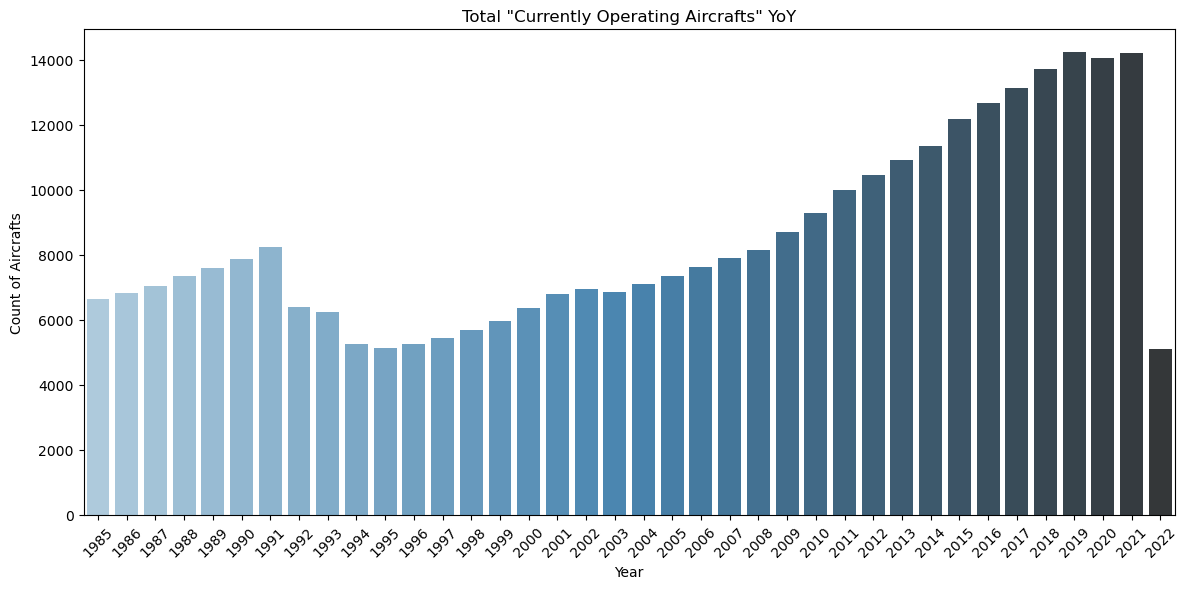

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate by year for bar plot
yearly_summary = result.groupby('year')['currently operating'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_summary, x='year', y='currently operating', palette='Blues_d')
plt.title('Total "Currently Operating Aircrafts" YoY')
plt.xlabel('Year')
plt.ylabel('Count of Aircrafts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# Top 25 Operators

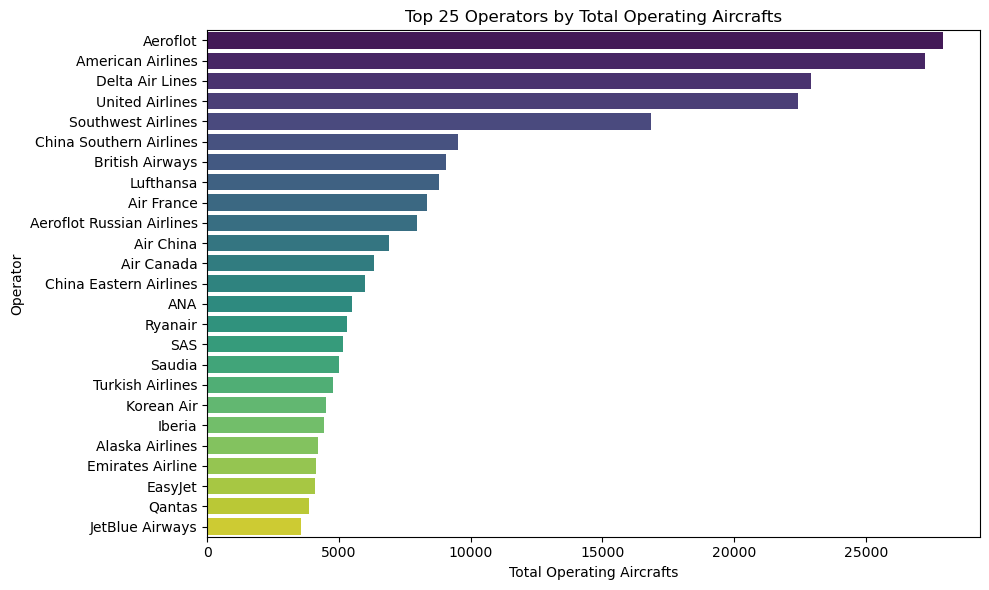

In [72]:
top_operators = (
    result.groupby('operator')['currently operating']
    .sum()
    .sort_values(ascending=False)
    .head(25)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_operators, y='operator', x='currently operating', palette='viridis')
plt.title('Top 25 Operators by Total Operating Aircrafts')
plt.xlabel('Total Operating Aircrafts')
plt.ylabel('Operator')
plt.tight_layout()
plt.show()

In [73]:
# Line Plot: Master Series Evolution

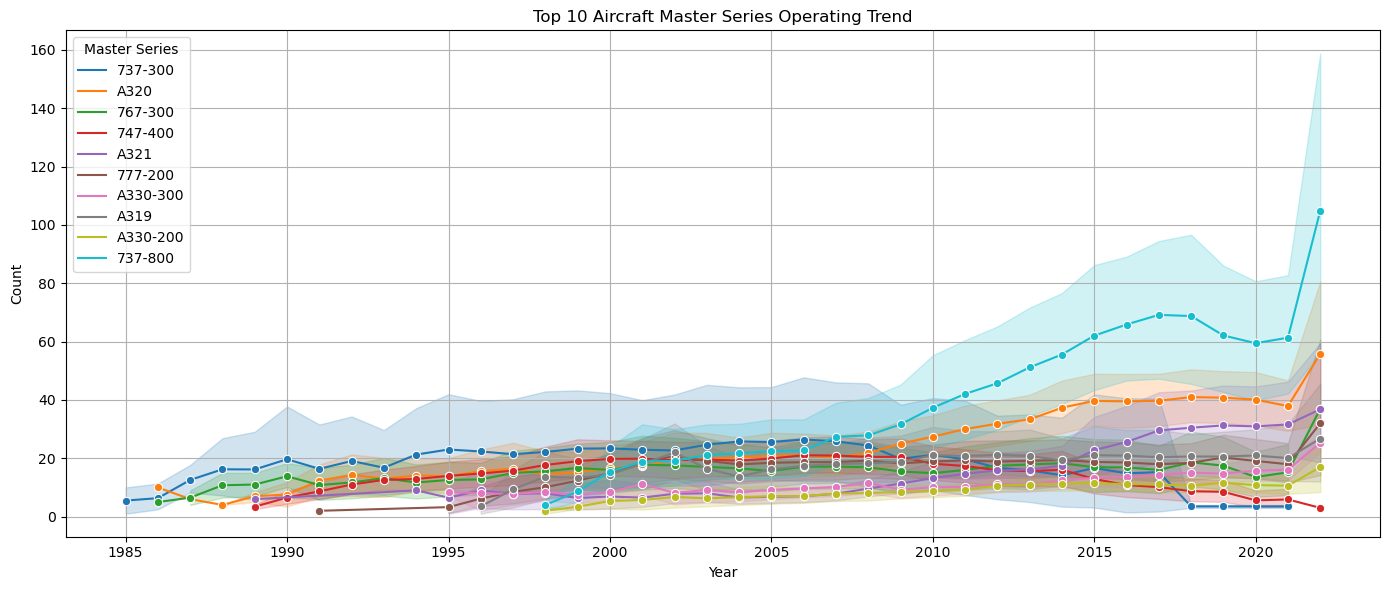

In [74]:
top_series = result['master series'].value_counts().head(10).index
series_trend = result[result['master series'].isin(top_series)]

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=series_trend,
    x='year', y='currently operating',
    hue='master series', marker='o'
)
plt.title('Top 10 Aircraft Master Series Operating Trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Master Series')
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# Problem Statement 3:
# Exact count of new aircrafts that have been added in that particular year for an airline at a master series level.

In [76]:
# Sort the data to prepare for first appearance detection
df_valid = df_fleet.sort_values(by=['serial number', 'operator', 'year'])

# Identify first appearance of each serial number for each operator
df_first_appearance = (
    df_valid
    .drop_duplicates(subset=['serial number', 'operator'], keep='first')
)

# Group by year, operator, and master series to count unique serial numbers.
new_aircraft_counts = (
    df_first_appearance
    .groupby(['year', 'operator', 'master series'])
    .agg(new_aircrafts_added=('serial number', 'nunique'))
    .reset_index()
)

In [77]:
new_aircraft_counts

,year,operator,master series,new_aircrafts_added
0,1985,ANA,727-100,1
1,1985,ANA,727-200,14
2,1985,ANA,737-200,14
3,1985,ANA,747-100,17
4,1985,ANA,767-200,21
...,...,...,...,...
6661,2022,Wizz Air Abu Dhabi,A321neo,4
6662,2022,Wizz Air Malta,A320,2
6663,2022,Wizz Air Malta,A320neo,3
6664,2022,Wizz Air Malta,A321neo,22


In [78]:
# Group by year and operator, 
# then sum new aircrafts added
new_aircrafts_yearly_sum = (
    new_aircraft_counts
    .groupby(['year', 'operator'])['new_aircrafts_added']
    .sum()
    .reset_index()
    .sort_values(['year', 'new_aircrafts_added'], ascending=[True, False])
)

In [81]:
new_aircrafts_yearly_sum.head(10)

,year,operator,new_aircrafts_added
1,1985,Aeroflot,4879
11,1985,American Airlines,491
51,1985,United Airlines,440
22,1985,Delta Air Lines,296
15,1985,British Airways,268
7,1985,Air France,233
34,1985,Lufthansa,191
5,1985,Air Canada,185
42,1985,SAS,136
27,1985,Iberia,127


In [82]:
# Line Chart: Total New Aircrafts Added Over Time

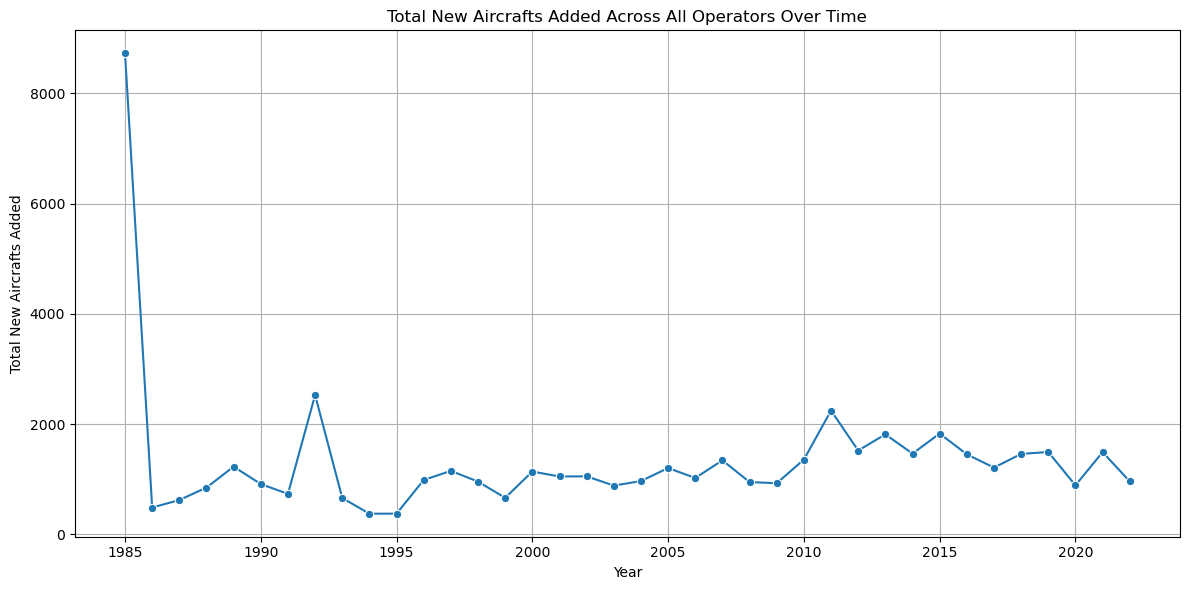

In [83]:
total_new_aircrafts = (
    new_aircrafts_yearly_sum
    .groupby('year')['new_aircrafts_added']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_new_aircrafts, x='year', y='new_aircrafts_added', marker='o')

plt.title('Total New Aircrafts Added Across All Operators Over Time')
plt.xlabel('Year')
plt.ylabel('Total New Aircrafts Added')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
# Sum of all new aircrafts added per year
total_new_aircrafts_per_year = (
    new_aircraft_counts
    .groupby('year')['new_aircrafts_added']
    .sum()
    .reset_index()
    .rename(columns={'new_aircrafts_added': 'total_new_aircrafts'})
)

In [85]:
print(total_new_aircrafts_per_year.head(50))

    year  total_new_aircrafts
0   1985                 8725
1   1986                  485
2   1987                  621
3   1988                  847
4   1989                 1227
5   1990                  911
6   1991                  733
7   1992                 2526
8   1993                  658
9   1994                  373
10  1995                  374
11  1996                  985
12  1997                 1150
13  1998                  955
14  1999                  661
15  2000                 1138
16  2001                 1048
17  2002                 1051
18  2003                  883
19  2004                  965
20  2005                 1202
21  2006                 1021
22  2007                 1341
23  2008                  947
24  2009                  926
25  2010                 1355
26  2011                 2244
27  2012                 1519
28  2013                 1813
29  2014                 1463
30  2015                 1827
31  2016                 1450
32  2017  

In [86]:
# Stacked Area Chart: Year-wise Composition by operator

C:\Users\Peeyush.sharma\AppData\Local\Temp\ipykernel_29348\1124885157.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


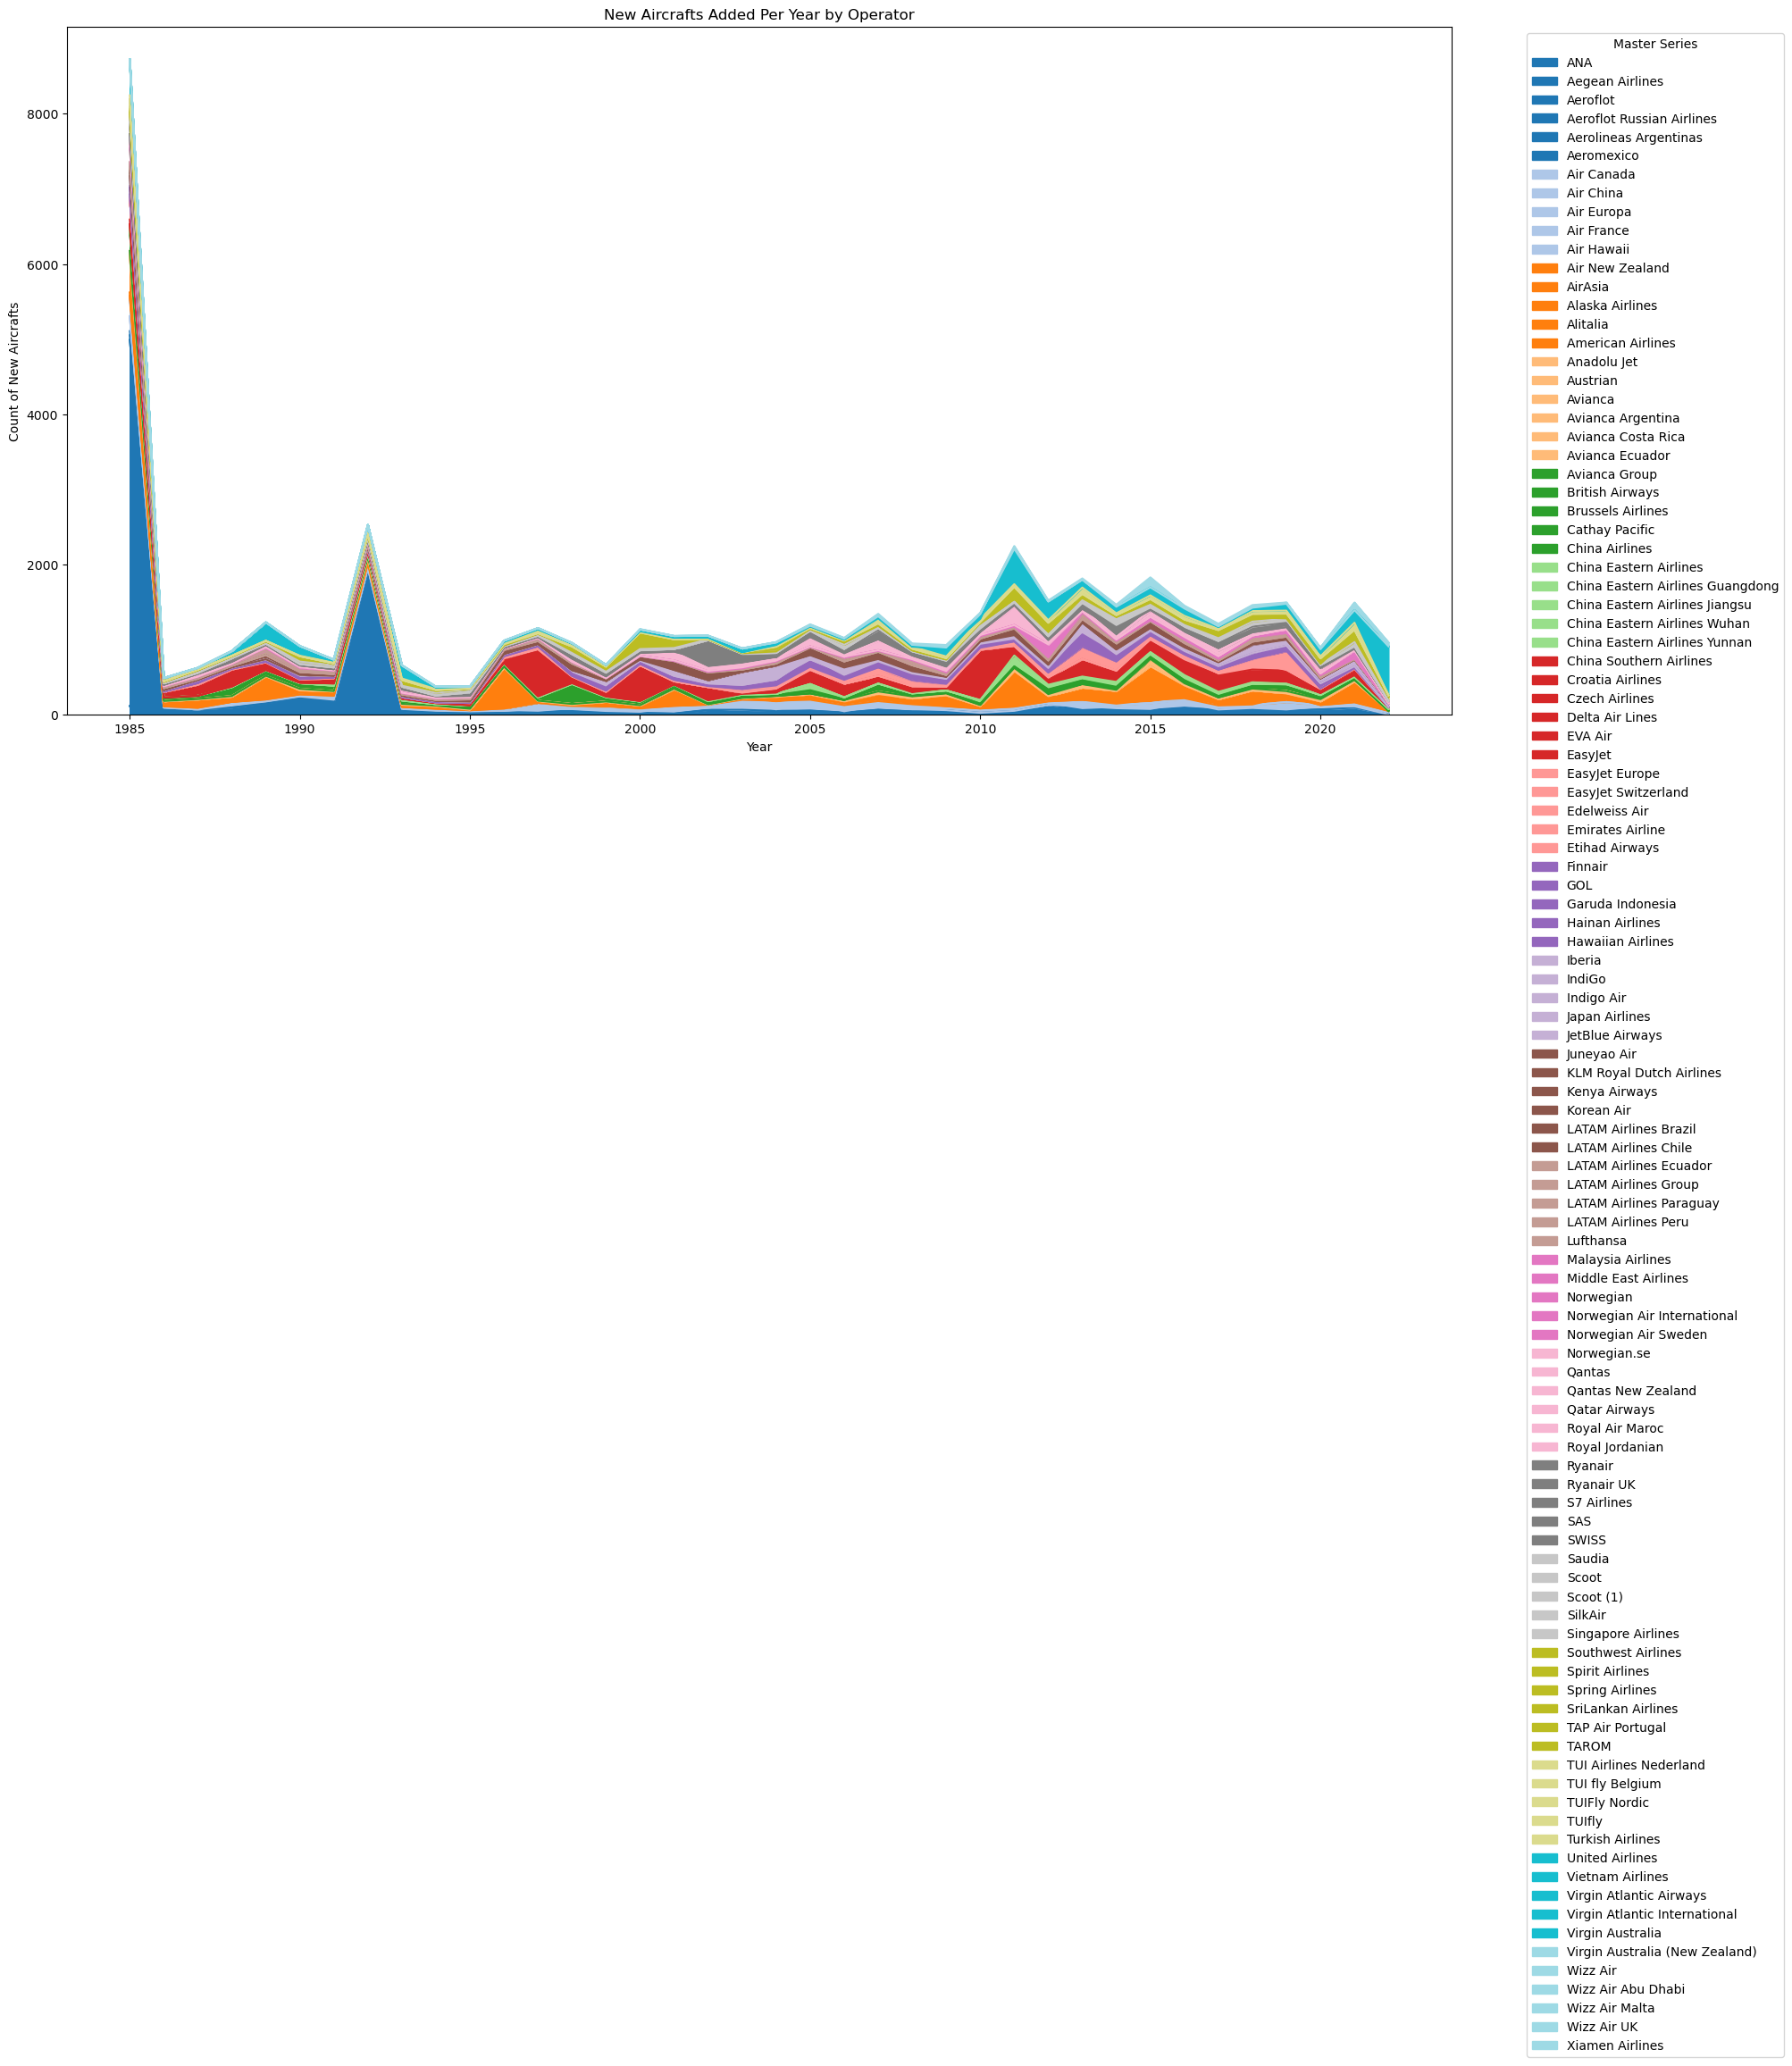

In [97]:
# Pivot to reshape for stacked area chart
pivot_df = new_aircraft_counts.pivot_table(
    index='year',
    columns='operator',
    values='new_aircrafts_added',
    aggfunc='sum',
    fill_value=0
)

# Plot
pivot_df.plot.area(figsize=(20, 10), colormap='tab20')
plt.title('New Aircrafts Added Per Year by Operator')
plt.xlabel('Year')
plt.ylabel('Count of New Aircrafts')
plt.legend(title='Master Series', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 Operator-Master Series Pairs by Total New Aircrafts

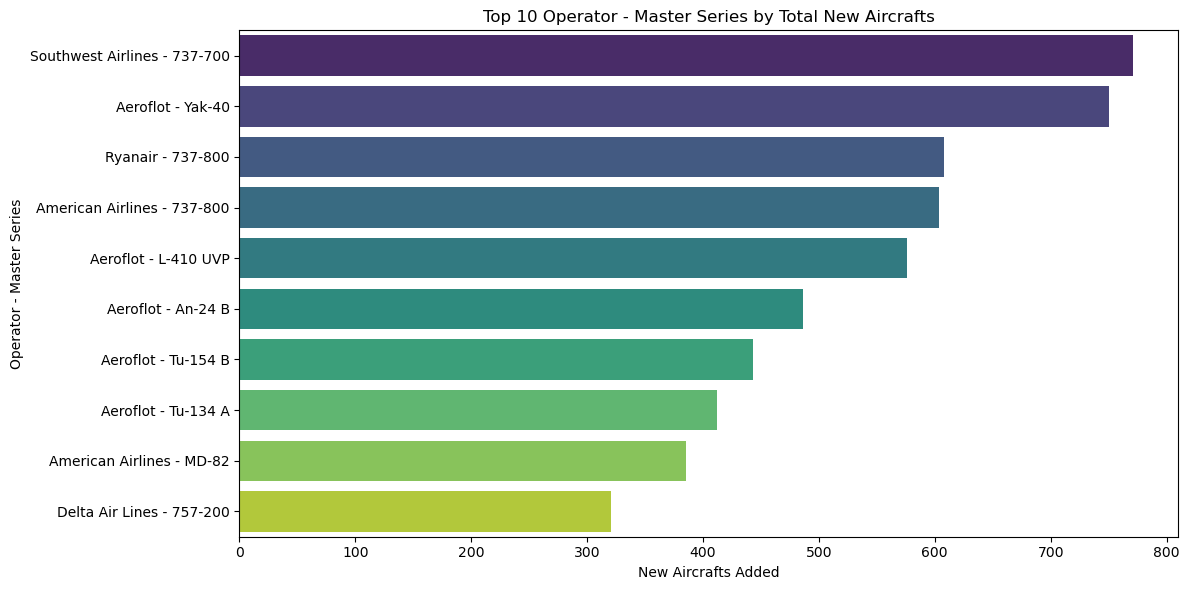

In [100]:
top_pairs = (
    new_aircraft_counts
    .groupby(['operator', 'master series'])['new_aircrafts_added']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_pairs,
    x='new_aircrafts_added',
    y=top_pairs['operator'] + ' - ' + top_pairs['master series'],
    palette='viridis'
)
plt.title('Top 10 Operator - Master Series by Total New Aircrafts')
plt.xlabel('New Aircrafts Added')
plt.ylabel('Operator - Master Series')
plt.tight_layout()
plt.show()

In [101]:
# Problem Statement 4:
# Average age of each Master Series within an airline operator for each year

In [103]:
# defining a reusable function

In [104]:
def is_in_service(df):
    return (
        (df['in_service_loi_flag'] == 'Y') |
        (
            (df['in_service_loi_flag'] == 'Z') &
            (df['status'].str.lower().isin(['in service', 'storage']))
        )
    )

In [108]:
# converting 'in service date' in datetime format
df_fleet['in service date'] = pd.to_datetime(df_fleet['in service date'], errors='coerce')

# Earliest in-service date for each serial number
serial_to_first_service = (
    df_fleet.dropna(subset=['in service date'])
    .groupby('serial number')['in service date']
    .min()
    .reset_index()
    .rename(columns={'in service date': 'first_in_service_date'})
)

# Merging earliest in-service date into main dataset
df_with_first_service = df_fleet.merge(serial_to_first_service, on='serial number', how='left')

# Filtering only 'in service' records using the reusable function
df_active = df_with_first_service[is_in_service(df_with_first_service)].copy()

# To calculate the average age = year - first_in_service_date.year
df_active['age'] = df_active['year'] - df_active['first_in_service_date'].dt.year

# Group by year, operator, and master series, and final average age
avg_age_summary = (
    df_active
    .groupby(['year', 'operator', 'master series'])['age']
    .mean()
    .reset_index()
    .rename(columns={'age': 'avg_age'})
    .sort_values(['year', 'operator'])
)

In [109]:
avg_age_summary

,year,operator,master series,avg_age
0,1985,ANA,727-200,10.666667
1,1985,ANA,737-200,10.571429
2,1985,ANA,747-100,4.941176
3,1985,ANA,767-200,0.904762
4,1985,ANA,L-1011 TriStar 1,10.272727
...,...,...,...,...
18233,2022,Wizz Air Malta,A320neo,2.000000
18234,2022,Wizz Air Malta,A321neo,16.956522
18235,2022,Wizz Air UK,A320,23.500000
18236,2022,Wizz Air UK,A321,3.666667


In [110]:
# Heatmap: Operator vs Year by Average Age

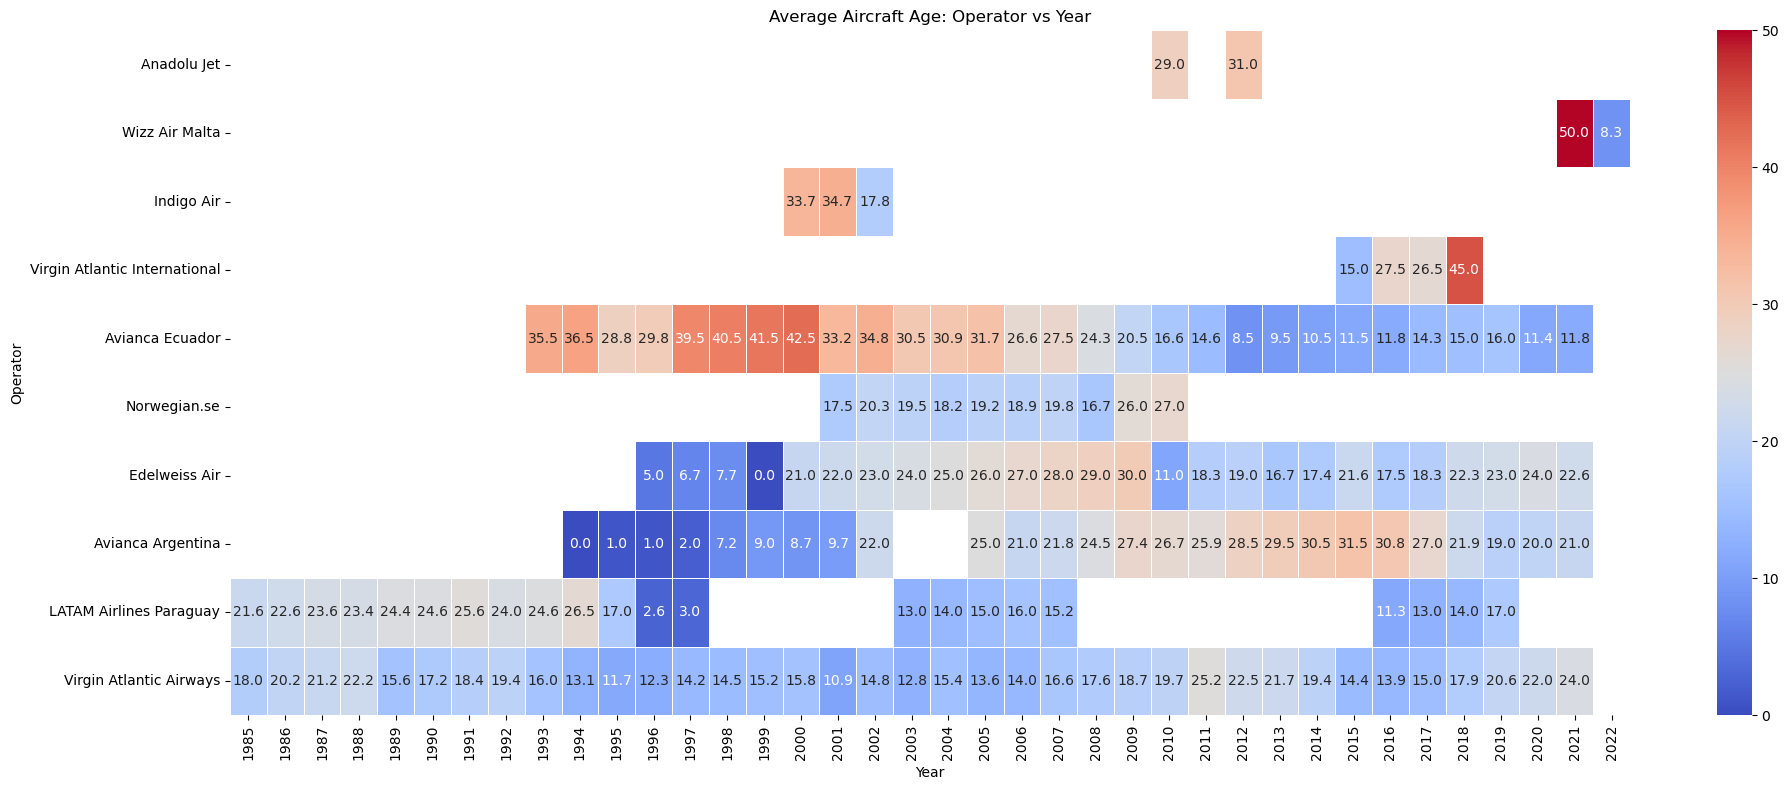

In [116]:
# Pivot to form operator vs year matrix
heatmap_data = avg_age_summary.pivot_table(
    index='operator', columns='year', values='avg_age', aggfunc='mean'
)

# Filter top operators (optional for readability)
top_heatmap = heatmap_data.loc[heatmap_data.mean(axis=1).nlargest(10).index]

# Plot
plt.figure(figsize=(20, 8))
sns.heatmap(top_heatmap, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Aircraft Age: Operator vs Year')
plt.xlabel('Year')
plt.ylabel('Operator')
plt.tight_layout()
plt.show()

In [122]:
avg_age_summary.tail()

,year,operator,master series,avg_age
18233,2022,Wizz Air Malta,A320neo,2.000000
18234,2022,Wizz Air Malta,A321neo,16.956522
18235,2022,Wizz Air UK,A320,23.500000
18236,2022,Wizz Air UK,A321,3.666667
18237,2022,Wizz Air UK,A321neo,0.500000


In [123]:
# Top 10 Operators with Oldest Fleets (Latest Year)

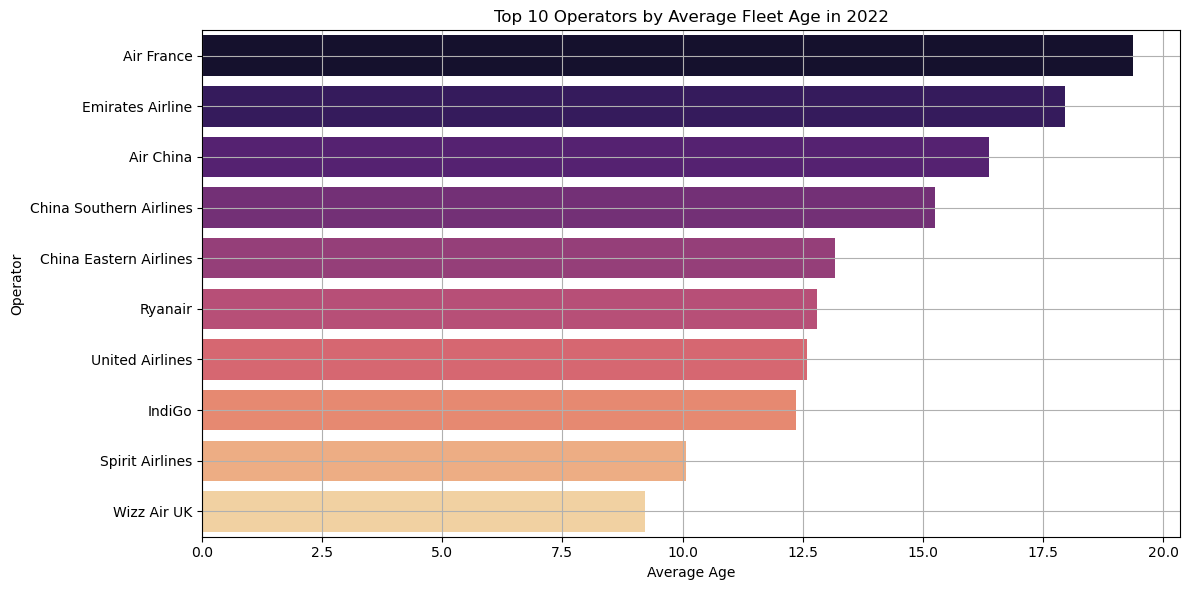

In [124]:
latest_year = avg_age_summary['year'].max()
top_old_operators = (
    avg_age_summary[avg_age_summary['year'] == latest_year]
    .groupby('operator')['avg_age']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x=top_old_operators.values, y=top_old_operators.index, palette='magma')
plt.title(f'Top 10 Operators by Average Fleet Age in {latest_year}')
plt.xlabel('Average Age')
plt.ylabel('Operator')
plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
# Top Manufacturers with Highest Average Aircraft Age by Series

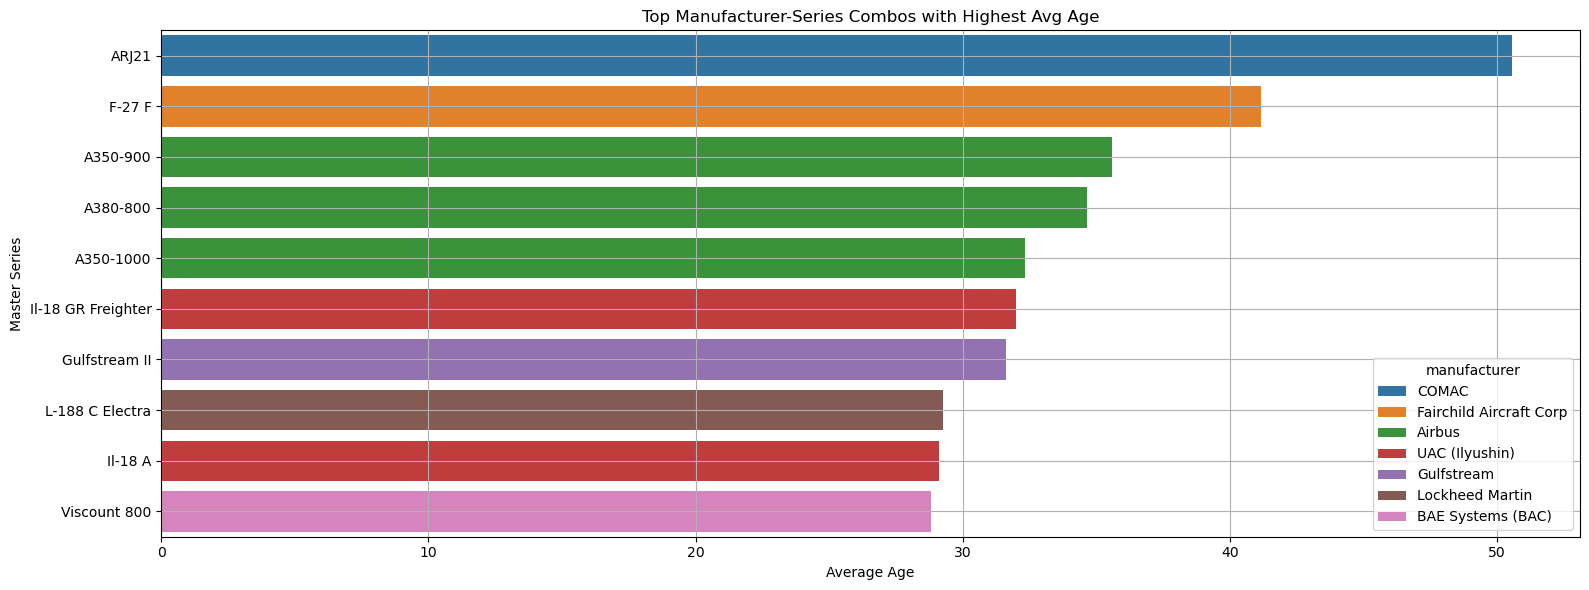

In [135]:
df_active['manufacturer'] = df_active['manufacturer'].fillna('Unknown')
manu_series_avg_age = (
    df_active
    .groupby(['manufacturer', 'master series'])['age']
    .mean()
    .reset_index()
    .sort_values(by='age', ascending=False)
)

top_manufacturer_series = manu_series_avg_age.head(10)

plt.figure(figsize=(16, 6))
sns.barplot(
    data=top_manufacturer_series,
    x='age', y='master series', hue='manufacturer', dodge=False
)
plt.title('Top Manufacturer-Series Combos with Highest Avg Age')
plt.xlabel('Average Age')
plt.ylabel('Master Series')
plt.grid(True)
plt.tight_layout()
plt.show()

In [132]:
# Boxplot: Distribution of Aircraft Age by Operator (Latest Year)

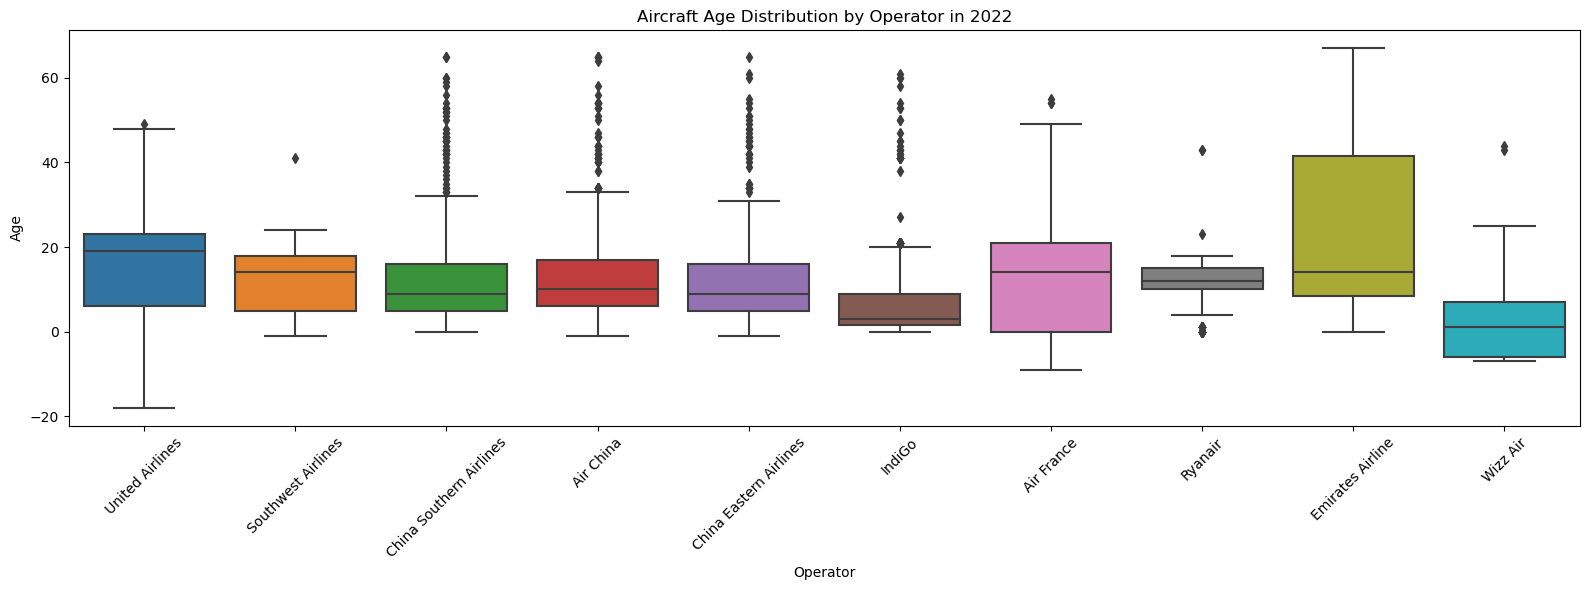

In [136]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df_active[df_active['year'] == latest_year],
    x='operator', y='age',
    order=df_active[df_active['year'] == latest_year]['operator'].value_counts().head(10).index
)
plt.title(f'Aircraft Age Distribution by Operator in {latest_year}')
plt.xlabel('Operator')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [137]:
# Problem Statement 2:
# Exact count of aircrafts that have exited and retired in a particular year for an airline at a master series level.

In [144]:
# Identifying 'in service' birds
flyable_df = df_fleet[is_in_service(df_fleet)][
    ['key', 'year', 'operator', 'master series']
].copy()

# Renaming columns
flyable_df = flyable_df.rename(columns={
    'year': 'flyable_year',
    'operator': 'flyable_operator',
    'master series': 'flyable_master_series'
})

In [145]:
# Merging to find all future flyable records for same aircraft key
merged = df_fleet.merge(
    flyable_df,
    on='key',
    how='left',
    suffixes=('', '_flyable')
)

# Filter only future flyable records (flyable_year > current year)
merged = merged[merged['flyable_year'] > merged['year']]

In [153]:
# For each original row, check:
# 1) Is there any future flyable record with same operator & master series?
merged['FutureSameOperator'] = (
    (merged['operator'] == merged['flyable_operator']) &
    (merged['master series'] == merged['flyable_master_series'])
)

# 2) Is there any future flyable record with different operator but same master series?
merged['FutureOtherOperator'] = (
    (merged['operator'] != merged['flyable_operator']) &
    (merged['master series'] == merged['flyable_master_series'])
)

In [154]:
# Now aggregate these booleans per original row index:
agg = merged.groupby(merged.index).agg({
    'FutureSameOperator': 'max',  # True if any True
    'FutureOtherOperator': 'max'
})

# Join back these flags to original df
df_fleet = df_fleet.join(agg)

# Fill missing (no future flyable record) with False
df_fleet['FutureSameOperator'] = df_fleet['FutureSameOperator'].fillna(False)
df_fleet['FutureOtherOperator'] = df_fleet['FutureOtherOperator'].fillna(False)

# Classify exit_type
def classify(row):
    status = row['status_lower']
    if status not in ['retired', 'written off']:
        return None
    
    if row['FutureSameOperator']:
        # Still flying with same operator in future, so not retired/exited
        return None
    elif row['FutureOtherOperator']:
        # Transferred to different operator, so exited
        return 'exited'
    else:
        # No future flyable anywhere, retired
        return 'retired'

df_fleet['exit_type'] = df_fleet.apply(classify, axis=1)

In [155]:
# Finally group and summarize as before
summary = (
    df_fleet[df_fleet['exit_type'].notnull()]
    .groupby(['year', 'operator', 'master series', 'exit_type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

if 'retired' not in summary.columns:
    summary['retired'] = 0
if 'exited' not in summary.columns:
    summary['exited'] = 0

summary = summary.rename(columns={'retired': 'retired_count', 'exited': 'exited_count'})
summary = summary[['year', 'operator', 'master series', 'retired_count', 'exited_count']]

In [156]:
# summary

exit_type,year,operator,master series,retired_count,exited_count
0,1985,ANA,727-100,1,0
1,1985,Aeroflot,An-10 A,6,0
2,1985,Aeroflot,An-12A,1,0
3,1985,Aeroflot,An-12B,2,0
4,1985,Aeroflot,An-24,9,0
...,...,...,...,...,...
7489,2022,United Airlines,737-200,1,0
7490,2022,United Airlines,737-300,3,0
7491,2022,United Airlines,737-500,4,0
7492,2022,United Airlines,747SP,0,2


In [157]:
# Ensure numeric type
summary['retired_count'] = summary['retired_count'].astype(int)
summary['exited_count'] = summary['exited_count'].astype(int)

# Grand totals
total_retired = summary['retired_count'].sum()
total_exited = summary['exited_count'].sum()

print(f"Total Retired Aircraft: {total_retired}")
print(f"Total Exited Aircraft: {total_exited}")

Total Retired Aircraft: 33237
Total Exited Aircraft: 5392


In [158]:
# Aircraft Exit/Retirement Trend Over Time

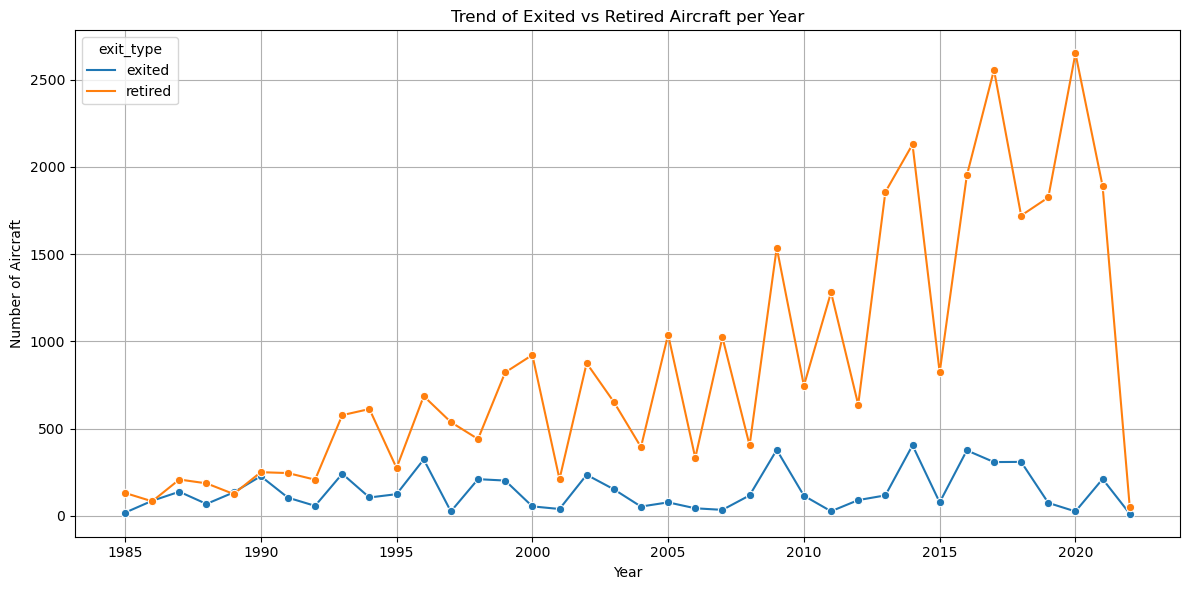

In [159]:
# Aggregate counts per year and exit type
trend = (
    df_fleet[df_fleet['exit_type'].notna()]
    .groupby(['year', 'exit_type'])['serial number']
    .nunique()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend, x='year', y='serial number', hue='exit_type', marker='o')
plt.title('Trend of Exited vs Retired Aircraft per Year')
plt.ylabel('Number of Aircraft')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
# Top Operators with Most Retirements/Exits

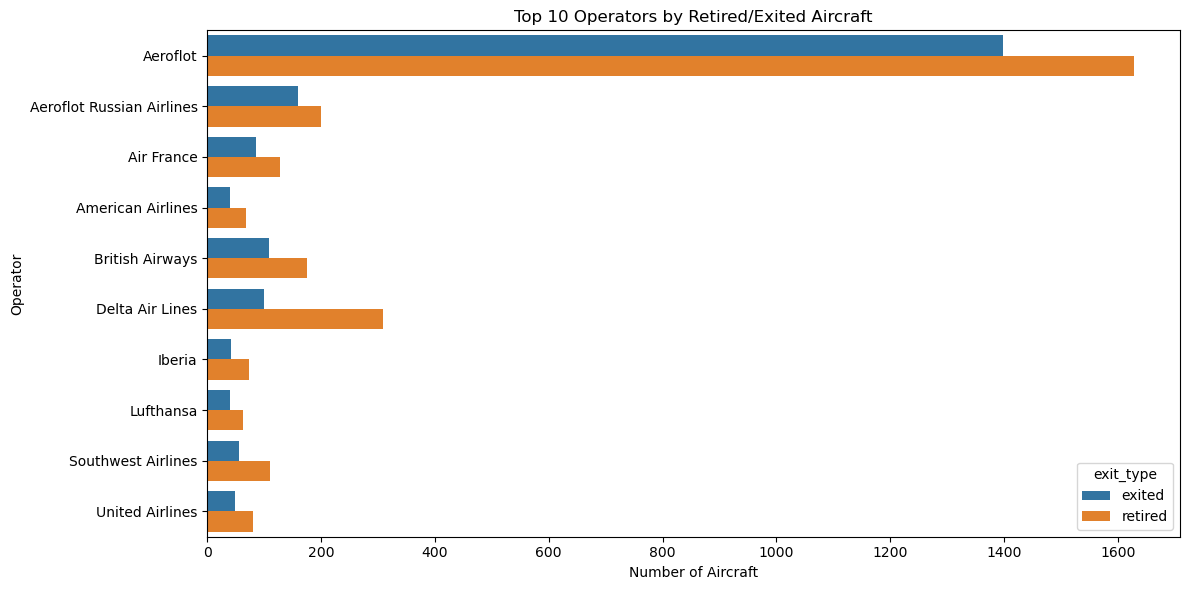

In [161]:
# Aggregate total exits/retirements by operator
top_ops = (
    df_fleet[df_fleet['exit_type'].notna()]
    .groupby(['operator', 'exit_type'])['serial number']
    .nunique()
    .reset_index()
)

# Top 10 operators overall
top_10_ops = (
    top_ops.groupby('operator')['serial number'].sum()
    .nlargest(10).index.tolist()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_ops[top_ops['operator'].isin(top_10_ops)],
    y='operator', x='serial number', hue='exit_type'
)
plt.title('Top 10 Operators by Retired/Exited Aircraft')
plt.xlabel('Number of Aircraft')
plt.ylabel('Operator')
plt.tight_layout()
plt.show()

In [162]:
# Pie Chart: Total Distribution

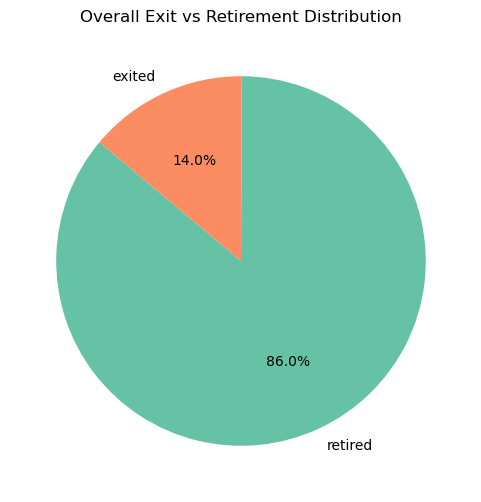

In [163]:
exit_pie = (
    df_fleet['exit_type']
    .value_counts()
    .rename_axis('exit_type')
    .reset_index(name='count')
)

plt.figure(figsize=(6, 6))
plt.pie(
    exit_pie['count'],
    labels=exit_pie['exit_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62']
)
plt.title('Overall Exit vs Retirement Distribution')
plt.show()

In [174]:
# Unfolding Logics Problems Wise

In [175]:
# Problem 1:
# Building a unique flag column using Status and In Service Date to help identifying the correct "Currently Operating" count YoY.

# Problem 2:
# Retired:
# If status == 'retired' or status == 'written off' and the aircraft never flies again.
# Exited:
# If aircraft with status == 'retired' or 'written off' later appears again (same serial number, master series, and manufacturer) 
# but with a different operator.

# Problem 3:
# Must detect when a serial number first appears with a new operator.
# Can’t use in service date directly due to reuse across operators.

# Problem 4:
# Detect the serial number having earliest service date.
# Compute age = year - earliest in-service year.